In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from math import sqrt
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource 
from sqlalchemy import create_engine
from bokeh.plotting import figure,show
import unittest

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
ideal_data = pd.read_csv("ideal.csv")

In [23]:
test_data.head(1000)

,x,y
0,-5.0,224.968630
1,-14.1,-3194.459500
2,12.1,-1.342644
3,-18.1,-1505.915800
4,9.4,0.775689
...,...,...
95,5.9,4.629589
96,15.2,3735.075700
97,-0.5,110.028480
98,-11.0,4310.896500


In [24]:
train_data.head(1000)

,x,y1,y2,y3,y4
0,-20.0,0.052658,20.164574,-8794.8430,899.703000
1,-19.9,-0.326488,20.199387,-8667.6455,893.206600
2,-19.8,0.073250,19.934326,-8541.1090,887.659850
3,-19.7,-0.244405,20.028587,-8416.3770,881.768500
4,-19.6,-0.405374,19.745829,-8292.8440,874.972300
...,...,...,...,...,...
395,19.5,0.110373,19.173489,6658.9243,89.518120
396,19.6,-0.067509,20.075966,6766.7026,91.275406
397,19.7,-0.172805,19.949532,6874.2880,93.216950
398,19.8,-0.259945,19.606918,6983.3086,95.787540


In [25]:
ideal_data.head(1000)

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19.5,0.605540,0.795815,10.605540,5.795815,-10.605540,-0.605540,-0.947580,-0.117020,1.591630,...,39.302770,-38.602093,2.970414,-0.012422,12.970414,5.273000,-5.273000,0.240949,0.605540,0.714434
396,19.6,0.681964,0.731386,10.681964,5.731386,-10.681964,-0.681964,-0.930426,0.774356,1.462772,...,39.540980,-38.834310,2.975530,-0.012438,12.975530,5.278115,-5.278115,0.249389,0.681964,0.667902
397,19.7,0.751573,0.659649,10.751574,5.659649,-10.751574,-0.751573,-0.910947,-0.994669,1.319299,...,39.775787,-39.070175,2.980619,-0.012453,12.980619,5.283204,-5.283204,0.247887,0.751573,0.612840
398,19.8,0.813674,0.581322,10.813674,5.581322,-10.813674,-0.813674,-0.889191,0.612391,1.162644,...,40.006836,-39.309338,2.985682,-0.012469,12.985682,5.288267,-5.288267,0.236503,0.813674,0.549129


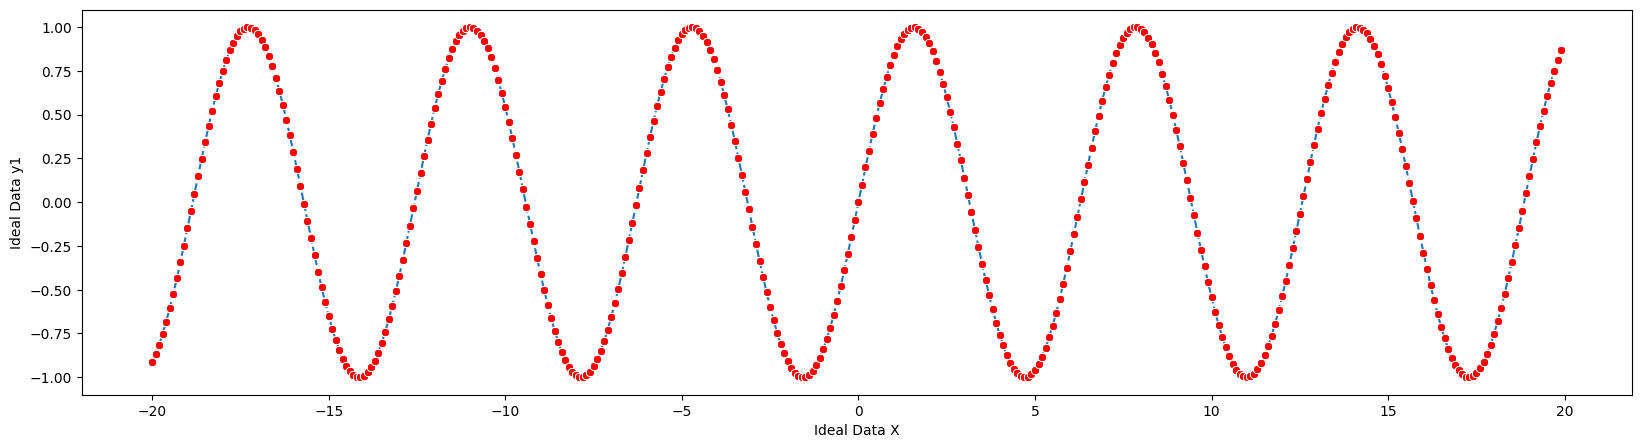

In [28]:
plt.figure(figsize=(20,5))
sns.lineplot(x = ideal_data['x'], y = ideal_data['y1'], data=ideal_data,marker="8",markerfacecolor="red", linestyle="--")
sns.scatterplot(x=ideal_data['x'], y = ideal_data['y1'], data=ideal_data)
plt.xlabel('Ideal Data X')
plt.ylabel('Ideal Data y1')
plt.show()

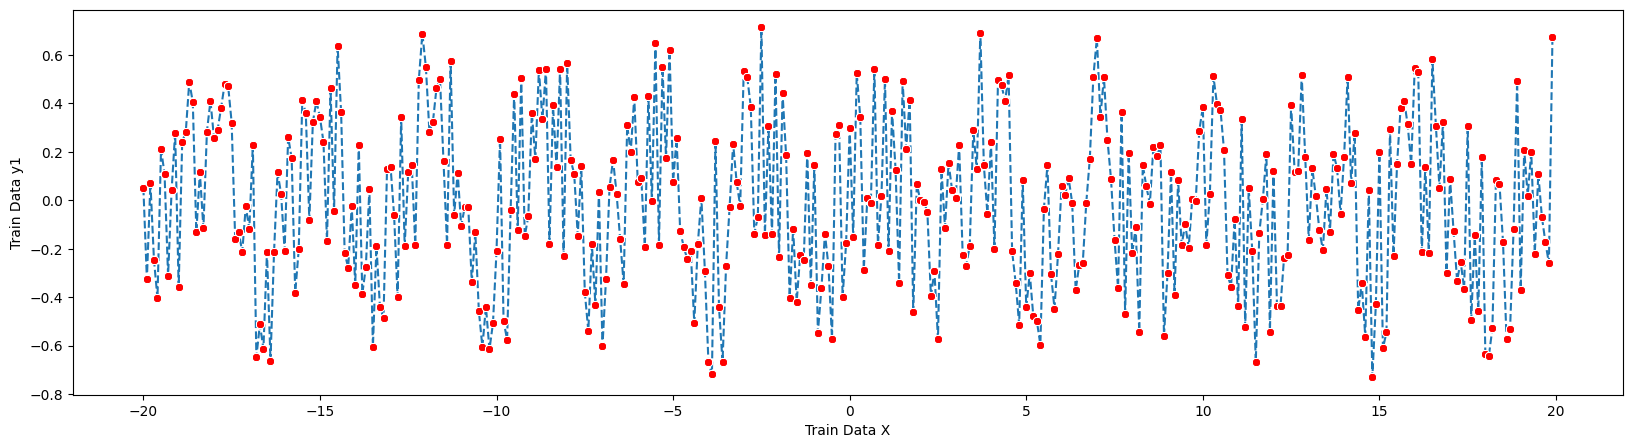

In [33]:
plt.figure(figsize=(20,5))
sns.lineplot(x = train_data['x'], y = train_data['y1'], data=train_data,marker="8",markerfacecolor="red", linestyle="--")
sns.scatterplot(x=train_data['x'], y = train_data['y1'], data=train_data)
plt.xlabel('Train Data X')
plt.ylabel('Train Data y1')
plt.show()

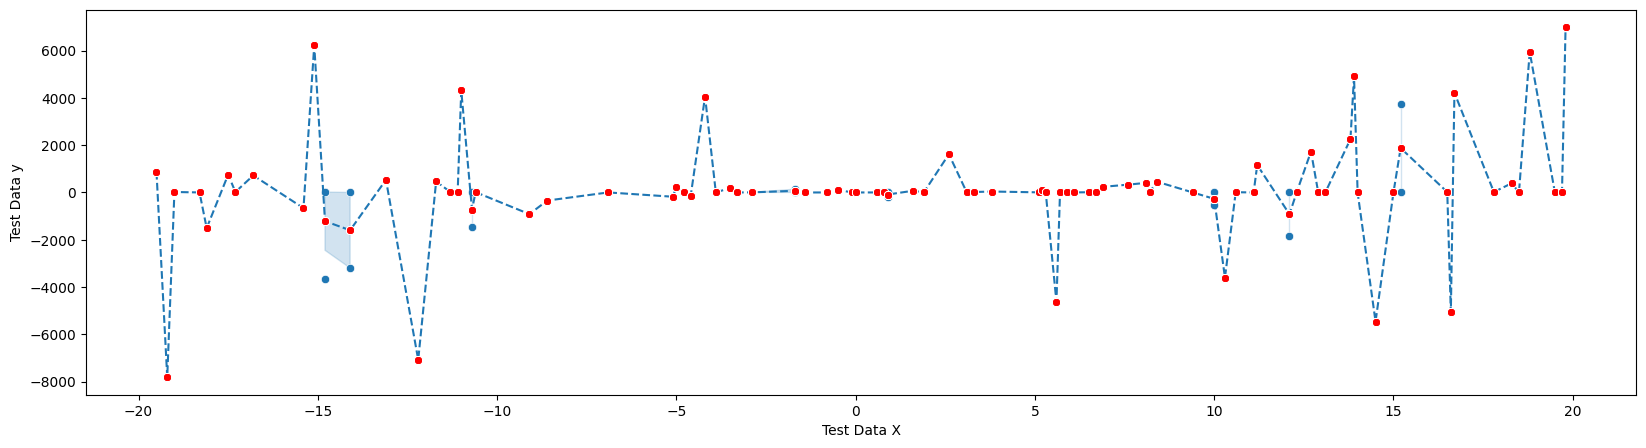

In [9]:
plt.figure(figsize=(20,5))
sns.lineplot(x = test_data['x'], y = test_data['y'], data=test_data,marker="8",markerfacecolor="red", linestyle="--")
sns.scatterplot(x=test_data['x'], y = test_data['y'], data=test_data)
plt.xlabel('Test Data X')
plt.ylabel('Test Data y')
plt.show()

In [10]:

ideal_function = []
for i in range(1,51):
    ideal_func = pd.read_csv('ideal.csv')
    ideal_function.append(ideal_func)

In [11]:
# mean_square_error =(np.square(train_data['y1']-ideal_data['y1'])).mean()
# mean_square_error

